In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def parse_hex_line(line: str) -> int:
    parts = line.strip().split()[:2]
    values = [int(p, 16) for p in parts if p]

    if len(values) < 2:
        raise ValueError("Each line should contain at least two hex values.")

    return values[0] + 255 * values[1]

def parse_data_file(file_path: str) -> dict[int, np.ndarray]:
    extract = []

    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            parsed_value = parse_hex_line(line)
            extract.append(parsed_value)

    return extract

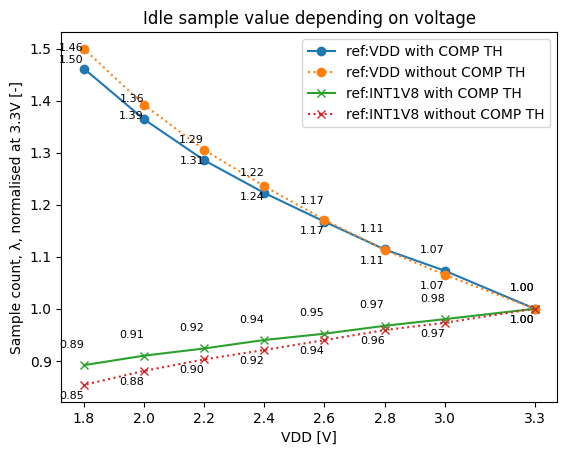

In [32]:
measurement_values = ['3V3', '3V0', '2V8', '2V6', '2V4', '2V2', '2V0', '1V8']
measurement_values_int = np.array([3.3, 3.0, 2.8, 2.6, 2.4, 2.2, 2.0, 1.8])

def F(locs, names, styles, marker):
    for i, (loc, name, style, mark) in enumerate(zip(locs, names, styles, marker)):
        datas = [parse_data_file(f'data/{loc}/{v}.log') for v in measurement_values]
        means = np.array([np.mean(d) for d in datas])
        normalized_means = means / means[0]
        plt.plot(measurement_values_int, normalized_means, label=name, linestyle=style, marker=mark)

        # Add the value beside each point
        y_offs = 0.03 if i % 2 == 0 else -0.03
        for x, y in zip(measurement_values_int, normalized_means):
            plt.text(x, y + y_offs, f'{y:.2f}', fontsize=8, ha='right', va='bottom')

    plt.legend()
    plt.xticks(measurement_values_int)
    plt.xlabel("VDD [V]")
    plt.ylabel("Sample count, λ, normalised at 3.3V [-]")
    plt.title("Idle sample value depending on voltage")

F(['with_comp_th', 'without_comp_th', 'intref_with_comp_th', 'intref_without_comp_th'], ['ref:VDD with COMP TH', 'ref:VDD without COMP TH', 'ref:INT1V8 with COMP TH', 'ref:INT1V8 without COMP TH'], ['solid', 'dotted', 'solid', 'dotted'], ['o', 'o', 'x', 'x'])